In [ ]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [ ]:
IMAGE_SIZE = [224, 224]
from google.colab import drive 

In [ ]:
IMAGE_SIZE = [224, 224]
from google.colab import drive 

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train_path = "Covid19-dataset/train"
valid_path = "Covid19-dataset/test"

In [ ]:
resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

94773248/94765736 [==============================] - 1s 0us/step


In [ ]:
 for layer in resnet.layers:
    layer.trainable = False

In [ ]:
%cd /content/drive/MyDrive/
import glob
folders = glob.glob("Covid19-dataset/train/*")
folders

/content/drive/MyDrive


['Covid19-dataset/train/Viral Pneumonia',
 'Covid19-dataset/train/Covid',
 'Covid19-dataset/train/Normal']

In [ ]:
len(folders)

3

In [ ]:
x = Flatten()(resnet.output)

In [ ]:
prediction = Dense(len(folders), activation='softmax')(x)

model = Model(inputs=resnet.input, outputs=prediction)

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
______________________________________________________________________________________________

In [ ]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
training_set = train_datagen.flow_from_directory('Covid19-dataset/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 251 images belonging to 3 classes.


In [ ]:
test_set = test_datagen.flow_from_directory('Covid19-dataset/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 66 images belonging to 3 classes.


In [ ]:
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/50
8/8 [==============================] - 112s 13s/step - loss: 4.7165 - accuracy: 0.4223 - val_loss: 2.7692 - val_accuracy: 0.5000
Epoch 2/50
8/8 [==============================] - 61s 8s/step - loss: 2.5665 - accuracy: 0.4422 - val_loss: 0.9524 - val_accuracy: 0.6515
Epoch 3/50
8/8 [==============================] - 63s 8s/step - loss: 1.2034 - accuracy: 0.5737 - val_loss: 0.7073 - val_accuracy: 0.6818
Epoch 4/50
8/8 [==============================] - 63s 8s/step - loss: 0.8939 - accuracy: 0.6892 - val_loss: 0.3531 - val_accuracy: 0.8788
Epoch 5/50
8/8 [==============================] - 63s 8s/step - loss: 0.7736 - accuracy: 0.7211 - val_loss: 0.4778 - val_accuracy: 0.8636
Epoch 6/50
8/8 [==============================] - 62s 8s/step - loss: 0.5992 - accuracy: 0.7729 - val_loss: 0.6139 - val_accuracy: 0.7424
Epoch 7/50
8/8 [==============================] - 62s 8s/step - loss: 0.7378 - accuracy: 0.7171 - val_loss: 0.7466 - val_accuracy: 0.6515
Epoch 8/50
8/8 [================

In [ ]:
from tensorflow.keras.models import load_model

model.save('model_resnet50.h5')

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


In [ ]:
model=load_model('model_resnet50.h5')

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
______________________________________________________________________________________________

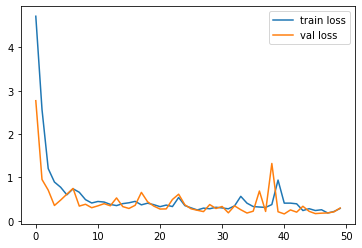

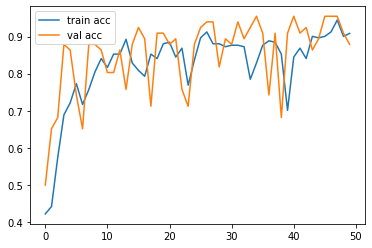

<Figure size 432x288 with 0 Axes>

In [31]:
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [32]:
y_pred = model.predict(test_set)

In [33]:
y_pred




array([[3.47941704e-02, 1.14838108e-01, 8.50367725e-01],
       [1.37994575e-04, 7.08634257e-01, 2.91227728e-01],
       [8.78466725e-01, 4.60455054e-03, 1.16928704e-01],
       [7.39388227e-01, 2.60596094e-03, 2.58005768e-01],
       [9.72252106e-04, 1.32206669e-02, 9.85807061e-01],
       [1.72777416e-03, 1.16408020e-02, 9.86631453e-01],
       [2.12236983e-03, 1.08513115e-02, 9.87026274e-01],
       [1.42423650e-02, 5.51921606e-01, 4.33836043e-01],
       [2.12950927e-05, 6.05377415e-03, 9.93924916e-01],
       [3.76386924e-05, 9.69473600e-01, 3.04886941e-02],
       [9.80010092e-01, 8.81912711e-05, 1.99016929e-02],
       [1.89273420e-03, 6.23264397e-03, 9.91874635e-01],
       [1.63032368e-04, 1.05744928e-01, 8.94092083e-01],
       [1.27750405e-04, 9.22212660e-01, 7.76595697e-02],
       [7.20461132e-04, 9.56237614e-01, 4.30419780e-02],
       [2.07282268e-04, 7.21118391e-01, 2.78674334e-01],
       [4.24190052e-03, 8.41087520e-01, 1.54670566e-01],
       [9.33057606e-01, 5.66797

In [34]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)
y_pred


array([2, 1, 0, 0, 2, 2, 2, 1, 2, 1, 0, 2, 2, 1, 1, 1, 1, 0, 2, 0, 0, 2,
       0, 1, 2, 0, 0, 1, 0, 1, 0, 2, 2, 0, 1, 2, 2, 0, 2, 0, 0, 1, 2, 0,
       2, 2, 1, 0, 1, 0, 2, 2, 2, 0, 2, 2, 1, 1, 0, 0, 0, 0, 2, 2, 0, 1])

In [38]:
img=image.load_img('Covid19-dataset/test/Covid/094.png',target_size=(224,224))

In [52]:
x=image.img_to_array(img)
x

array([[[77., 77., 77.],
        [80., 80., 80.],
        [85., 85., 85.],
        ...,
        [68., 68., 68.],
        [64., 64., 64.],
        [60., 60., 60.]],

       [[85., 85., 85.],
        [89., 89., 89.],
        [94., 94., 94.],
        ...,
        [75., 75., 75.],
        [75., 75., 75.],
        [69., 69., 69.]],

       [[92., 92., 92.],
        [95., 95., 95.],
        [99., 99., 99.],
        ...,
        [79., 79., 79.],
        [75., 75., 75.],
        [71., 71., 71.]],

       ...,

       [[ 0.,  0.,  0.],
        [ 1.,  1.,  1.],
        [25., 25., 25.],
        ...,
        [ 1.,  1.,  1.],
        [ 3.,  3.,  3.],
        [ 4.,  4.,  4.]],

       [[ 0.,  0.,  0.],
        [ 4.,  4.,  4.],
        [28., 28., 28.],
        ...,
        [ 1.,  1.,  1.],
        [ 3.,  3.,  3.],
        [ 3.,  3.,  3.]],

       [[ 0.,  0.,  0.],
        [ 6.,  6.,  6.],
        [28., 28., 28.],
        ...,
        [ 1.,  1.,  1.],
        [ 2.,  2.,  2.],
        [ 3.,  3.,  3.]]

In [53]:


x.shape



(224, 224, 3)

In [54]:
x=x/255

In [55]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [56]:
model.predict(img_data)



array([[9.9997175e-01, 2.7750075e-05, 4.2741198e-07]], dtype=float32)

In [58]:
a=np.argmax(model.predict(img_data), axis=1)
a

array([0])

In [60]:
a==0

array([ True])